In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
 # Fetch the library file, for example the tar.gz or whatever installable distribution you created
 with open("seaborn-0.10.1.tar.gz","wb") as f:
     f.write(project.get_file("seaborn-0.10.1.tar.gz").read())
        
 with open("seaborn-0.10.1.tar.gz","wb") as g:
     g.write(project.get_file("folium-0.11.0.tar.gz").read())

 # Install the library
!pip install seaborn-0.10.1.tar.gz
!pip install folium-0.11.0.tar.gz

Processing ./seaborn-0.10.1.tar.gz
  Stored in directory: /home/dsxuser/.cache/pip/wheels/a4/88/16/6ea3e62def3bf63e0072eab5c9c5c7834e14904fc305887843
Successfully built folium
Processing ./folium-0.11.0.tar.gz
ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: '/home/dsxuser/work/folium-0.11.0.tar.gz'



# Notebook Created for the Capstone Project (Coursera)

In [3]:
# import libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import folium
from folium import plugins
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%matplotlib inline

In [4]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [5]:
filename = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(filename)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Dataset Cleaning

In [6]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [8]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["X"], axis=0, inplace=True)
df.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)
df.dropna(subset=["JUNCTIONTYPE"], axis=0, inplace=True)
df.dropna(subset=["UNDERINFL"], axis=0, inplace=True)
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].replace(['Y'],'1')
df['UNDERINFL'] = df['UNDERINFL'].replace(['N'],'0')
df.ST_COLCODE = df.ST_COLCODE.astype('int64')
df.UNDERINFL = df.UNDERINFL.astype('int64')

In [9]:
df.drop(['INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'EXCEPTRSNDESC', 'INTKEY'], axis=1, inplace=True)

In [24]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
LOCATION           object
EXCEPTRSNCODE      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

In [26]:
pd.set_option('display.max_rows', None)

In [16]:
df['SEVERITYCODE'].value_counts()

1    124258
2     55809
Name: SEVERITYCODE, dtype: int64

In [15]:
df.groupby(['SEVERITYCODE'])['WEATHER'].value_counts(normalize=True)

SEVERITYCODE  WEATHER                 
1             Clear                       0.583681
              Raining                     0.168279
              Overcast                    0.146791
              Unknown                     0.086505
              Snowing                     0.005706
              Other                       0.004974
              Fog/Smog/Smoke              0.002937
              Sleet/Hail/Freezing Rain    0.000684
              Blowing Sand/Dirt           0.000290
              Severe Crosswind            0.000137
              Partly Cloudy               0.000016
2             Clear                       0.630096
              Raining                     0.193678
              Overcast                    0.153542
              Unknown                     0.013546
              Fog/Smog/Smoke              0.003297
              Snowing                     0.002974
              Other                       0.001971
              Sleet/Hail/Freezing Rain    0

In [16]:
df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts(normalize=True)

SEVERITYCODE  ROADCOND      
1             Dry               0.654694
              Wet               0.243791
              Unknown           0.086055
              Ice               0.007219
              Snow/Slush        0.006487
              Other             0.000612
              Standing Water    0.000587
              Sand/Mud/Dirt     0.000322
              Oil               0.000233
2             Dry               0.703793
              Wet               0.274221
              Unknown           0.012382
              Ice               0.004730
              Snow/Slush        0.002957
              Other             0.000699
              Standing Water    0.000466
              Sand/Mud/Dirt     0.000394
              Oil               0.000358
Name: ROADCOND, dtype: float64

# Inbalance Correction

In [ ]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
high_severity = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 2]

#Randomly select 55809 observations from the majority class
low_severity = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 1].sample(n=55809,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([high_severity, low_severity])

#plot the dataset after the undersampling
normalized_df['SEVERITYCODE'].value_counts(normalize=False).plot(kind='bar', color=['green','orange'])
plt.ylim(0, 60000)
plt.title("Balanced Dataset")
plt.xlabel("Severity Code")
plt.ylabel("Totals")

In [38]:
normalized_df.groupby(['SEVERITYCODE'])['WEATHER'].value_counts(normalize=True)

SEVERITYCODE  WEATHER                 
1             Clear                       0.581358
              Raining                     0.169095
              Overcast                    0.145890
              Unknown                     0.088839
              Snowing                     0.005375
              Other                       0.005017
              Fog/Smog/Smoke              0.003100
              Sleet/Hail/Freezing Rain    0.000788
              Blowing Sand/Dirt           0.000394
              Severe Crosswind            0.000108
              Partly Cloudy               0.000036
2             Clear                       0.630096
              Raining                     0.193678
              Overcast                    0.153542
              Unknown                     0.013546
              Fog/Smog/Smoke              0.003297
              Snowing                     0.002974
              Other                       0.001971
              Sleet/Hail/Freezing Rain    0

In [16]:
normalized_df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts(normalize=True)

SEVERITYCODE  ROADCOND      
1             Dry               0.653264
              Wet               0.243420
              Unknown           0.088050
              Ice               0.006845
              Snow/Slush        0.006719
              Other             0.000663
              Standing Water    0.000573
              Sand/Mud/Dirt     0.000305
              Oil               0.000161
2             Dry               0.703793
              Wet               0.274221
              Unknown           0.012382
              Ice               0.004730
              Snow/Slush        0.002957
              Other             0.000699
              Standing Water    0.000466
              Sand/Mud/Dirt     0.000394
              Oil               0.000358
Name: ROADCOND, dtype: float64

In [42]:
normalized_df.groupby(['SEVERITYCODE'])['COLLISIONTYPE'].value_counts(normalize=True)

SEVERITYCODE  COLLISIONTYPE
1             Parked Car       0.321525
              Angles           0.168414
              Rear Ended       0.151983
              Other            0.130230
              Sideswipe        0.124854
              Left Turn        0.065043
              Right Turn       0.018151
              Head On          0.009102
              Cycles           0.005429
              Pedestrian       0.005268
2             Rear Ended       0.253830
              Angles           0.242649
              Pedestrian       0.104302
              Other            0.102761
              Left Turn        0.096275
              Cycles           0.083822
              Parked Car       0.047018
              Sideswipe        0.043273
              Head On          0.015338
              Right Turn       0.010733
Name: COLLISIONTYPE, dtype: float64

In [46]:
normalized_df.groupby(['COLLISIONTYPE'])['WEATHER'].value_counts(normalize=True)

COLLISIONTYPE  WEATHER                 
Angles         Clear                       0.613618
               Raining                     0.204917
               Overcast                    0.160411
               Unknown                     0.012292
               Snowing                     0.003095
               Fog/Smog/Smoke              0.002964
               Other                       0.001744
               Sleet/Hail/Freezing Rain    0.000567
               Blowing Sand/Dirt           0.000218
               Severe Crosswind            0.000131
               Partly Cloudy               0.000044
Cycles         Clear                       0.725758
               Overcast                    0.147360
               Raining                     0.106605
               Unknown                     0.017466
               Other                       0.001205
               Fog/Smog/Smoke              0.001004
               Snowing                     0.000402
               Blowing S

In [39]:
normalized_df['SEVERITYCODE'].value_counts()

2    55809
1    55809
Name: SEVERITYCODE, dtype: int64

# Features related with Weather, Road or Light Condition

In [35]:
Feature = normalized_df[['SEVERITYCODE']]
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['LIGHTCOND'])], axis=1)
Feature.drop(['SEVERITYCODE'], axis = 1,inplace=True)
Feature.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
157662,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
113441,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
134358,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98151,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
147161,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [36]:
X = Feature
X[0:5]

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
157662,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
113441,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
134358,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98151,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
147161,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [11]:
Y = normalized_df['SEVERITYCODE'].values
Y

array([2, 2, 2, ..., 1, 1, 1])

In [37]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.01771067,  0.80678971, -0.05664514, -0.05921411, -0.41961606,
        -0.0066931 , -0.47072043, -0.01079269, -0.02522901, -0.06474919,
        -0.23228113,  0.68831485, -0.07629737, -0.01612086, -0.02610283,
        -0.01869567, -0.06972409, -0.02280131, -0.22993667, -0.59093181,
        -0.08544502, -0.07694803,  1.69715665, -0.00598647, -0.11804581,
        -1.3250388 , -0.18208683, -0.02856477, -0.21795765],
       [-0.01771067, -1.23948037, -0.05664514, -0.05921411, -0.41961606,
        -0.0066931 ,  2.12440321, -0.01079269, -0.02522901, -0.06474919,
        -0.23228113, -1.45282352, -0.07629737, -0.01612086, -0.02610283,
        -0.01869567, -0.06972409, -0.02280131, -0.22993667,  1.69224264,
        -0.08544502, -0.07694803, -0.5892208 , -0.00598647, -0.11804581,
         0.75469488, -0.18208683, -0.02856477, -0.21795765],
       [-0.01771067, -1.23948037, -0.05664514, -0.05921411,  2.38313093,
        -0.0066931 , -0.47072043, -0.01079269, -0.02522901, -0.06474919,
  

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.8, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (22323, 29) (22323,)
Test set: (89295, 29) (89295,)


# Logistic Regression

In [18]:
# import library
from sklearn.linear_model import LogisticRegression
# training
LR = LogisticRegression(C=2).fit(X_train,Y_train)
LR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
yhat_lg = LR.predict(X_test)
yhat_lg_prob = LR.predict_proba(X_test)
jaccard_lg = jaccard_similarity_score(Y_test, yhat_lg)
print("LR Jaccard index: ", jaccard_lg)
f1_score_lg = f1_score(Y_test, yhat_lg, average='weighted')
print("LR F1-score: ", f1_score_lg)
logloss_lg = log_loss(Y_test, yhat_lg_prob)
print("LR log loss: ", logloss_lg)

LR Jaccard index:  0.5526625230975979
LR F1-score:  0.5233813041972027
LR log loss:  0.6728057120280866


# K Nearest Neighbors

[0.51174198 0.5134554  0.54439778 0.50171902 0.51282827 0.51142841
 0.54889971 0.54601041 0.5509491 ]


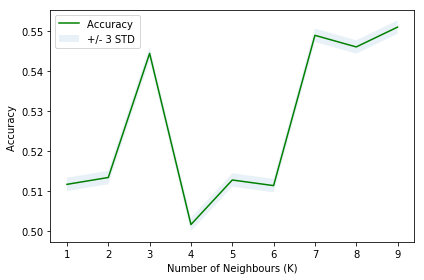

Best Accuracy 0.5509491012934655 with k= 9


In [42]:
# import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# try with 10 different values of k to find the best one
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

# accuracy
print(mean_acc)

# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 STD'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

# result
print( "Best Accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

In [46]:
# train model with k=9
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [47]:
yhat_knn = neigh.predict(X_test)
jaccard_knn = jaccard_similarity_score(Y_test, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)
f1_score_knn = f1_score(Y_test, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN Jaccard index:  0.5509491012934655
KNN F1-score:  0.5257537777132462


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
# create an instance of the DecisionTreeClassifier called loanTree
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
# training
loanTree.fit(X_train,Y_train)
loanTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
yhat_dt = loanTree.predict(X_test)
jaccard_dt = jaccard_similarity_score(Y_test, yhat_dt)
print("DT Jaccard index: ", jaccard_dt)
f1_score_dt = f1_score(Y_test, yhat_dt, average='weighted')
print("DT F1-score: ", f1_score_dt)

DT Jaccard index:  0.5509267036228233
DT F1-score:  0.5184795246585846


# Features with Colision Type and SDOT_COLCODE

In [12]:
Feature = normalized_df[['SEVERITYCODE']]
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['LIGHTCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['COLLISIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['SDOT_COLCODE'])], axis=1)
Feature = pd.concat([Feature,normalized_df['UNDERINFL']], axis=1)
Feature.drop(['SEVERITYCODE'], axis = 1,inplace=True)
Feature.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,54,55,56,58,61,64,66,68,69,UNDERINFL
157662,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113441,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134358,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98151,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147161,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
X = Feature
X[0:5]

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,54,55,56,58,61,64,66,68,69,UNDERINFL
157662,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113441,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134358,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98151,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147161,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-1.77106706e-02,  8.06789705e-01, -5.66451366e-02,
        -5.92141145e-02, -4.19616055e-01, -6.69310459e-03,
        -4.70720433e-01, -1.07926937e-02, -2.52290111e-02,
        -6.47491867e-02, -2.32281133e-01,  6.88314849e-01,
        -7.62973673e-02, -1.61208637e-02, -2.61028293e-02,
        -1.86956716e-02, -6.97240899e-02, -2.28013071e-02,
        -2.29936675e-01, -5.90931808e-01, -8.54450175e-02,
        -7.69480297e-02,  1.69715665e+00, -5.98646792e-03,
        -1.18045811e-01, -1.32503880e+00, -1.82086833e-01,
        -2.85647670e-02, -2.17957650e-01, -5.08628482e-01,
        -2.16124654e-01,  8.99062725e+00, -2.96202146e-01,
        -3.63120102e-01, -4.75287132e-01, -2.40749740e-01,
        -5.04537131e-01, -1.21052659e-01, -3.02950070e-01,
        -1.18396432e-01,  1.10877078e+00, -7.80594258e-02,
        -1.54279995e-01, -6.40739469e-01, -8.27437900e-02,
        -2.08192568e-01, -1.61171259e-01, -3.77694787e-02,
        -1.15933166e-02, -2.94922251e-02, -2.37967271e-0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (89294, 78) (89294,)
Test set: (22324, 78) (22324,)


In [16]:
# import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

[0.62771009 0.59586096 0.64818133 0.65360151 0.66309801 0.66600968
 0.66977244 0.644105   0.6527952  0.66529296 0.68500269 0.68374843
 0.68858627 0.68621215]


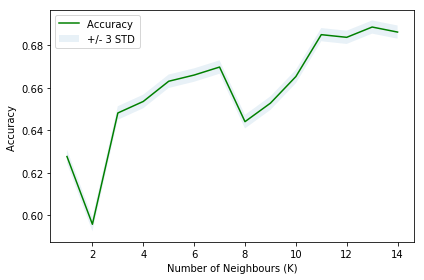

Best Accuracy 0.688586274861136 with k= 13


In [52]:
# try with 15 different values of k to find the best one
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

# accuracy
print(mean_acc)

# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 STD'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

# result
print( "Best Accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

In [17]:
# train model with k=13
neigh = KNeighborsClassifier(n_neighbors = 13).fit(X_train,Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [18]:
yhat_knn = neigh.predict(X_test)
jaccard_knn = jaccard_similarity_score(Y_test, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)
f1_score_knn = f1_score(Y_test, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN Jaccard index:  0.688586274861136
KNN F1-score:  0.6856974458329252


In [30]:
# import library
from sklearn.linear_model import LogisticRegression
# training
LR = LogisticRegression(C=4).fit(X_train,Y_train)
LR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
yhat_lg = LR.predict(X_test)
yhat_lg_prob = LR.predict_proba(X_test)
jaccard_lg = jaccard_similarity_score(Y_test, yhat_lg)
print("LR Jaccard index: ", jaccard_lg)
f1_score_lg = f1_score(Y_test, yhat_lg, average='weighted')
print("LR F1-score: ", f1_score_lg)
logloss_lg = log_loss(Y_test, yhat_lg_prob)
print("LR log loss: ", logloss_lg)

LR Jaccard index:  0.6958430388819208
LR F1-score:  0.6928812760928598
LR log loss:  0.5579978170956044


In [32]:
from sklearn.tree import DecisionTreeClassifier
# create an instance of the DecisionTreeClassifier called loanTree
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
# training
loanTree.fit(X_train,Y_train)
loanTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
yhat_dt = loanTree.predict(X_test)
jaccard_dt = jaccard_similarity_score(Y_test, yhat_dt)
print("DT Jaccard index: ", jaccard_dt)
f1_score_dt = f1_score(Y_test, yhat_dt, average='weighted')
print("DT F1-score: ", f1_score_dt)

DT Jaccard index:  0.6961118079197276
DT F1-score:  0.6940108307321592


In [57]:
Feature = normalized_df[['SEVERITYCODE']]
Feature = pd.concat([Feature,normalized_df['PERSONCOUNT']], axis=1)
Feature = pd.concat([Feature,normalized_df['PEDCOUNT']], axis=1)
Feature = pd.concat([Feature,normalized_df['PEDCYLCOUNT']], axis=1)
Feature = pd.concat([Feature,normalized_df['VEHCOUNT']], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['LOCATION'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['ADDRTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['COLLISIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['LIGHTCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['SDOT_COLCODE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['ST_COLCODE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['COLLISIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['JUNCTIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['HITPARKEDCAR'])], axis=1)
Feature = pd.concat([Feature,normalized_df['UNDERINFL']], axis=1)
Feature.drop(['SEVERITYCODE'], axis = 1,inplace=True)
Feature.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,10TH AVE AND E ALDER ST,10TH AVE AND E JEFFERSON ST,10TH AVE AND E MADISON ST,10TH AVE AND E PIKE ST,10TH AVE AND E PINE ST,10TH AVE AND E SENECA ST,...,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown,N,Y,UNDERINFL
157662,4,0,0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
113441,2,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
134358,3,0,0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
98151,3,0,0,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
147161,2,0,0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [58]:
X = Feature
X[0:5]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,10TH AVE AND E ALDER ST,10TH AVE AND E JEFFERSON ST,10TH AVE AND E MADISON ST,10TH AVE AND E PIKE ST,10TH AVE AND E PINE ST,10TH AVE AND E SENECA ST,...,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown,N,Y,UNDERINFL
157662,4,0,0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
113441,2,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
134358,3,0,0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
98151,3,0,0,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
147161,2,0,0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.8, random_state=15)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (22323, 163) (22323,)
Test set: (89295, 163) (89295,)


In [ ]:
# import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# try with 10 different values of k to find the best one
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

# accuracy
print(mean_acc)

# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 STD'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

# result
print( "Best Accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

In [45]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 2, 1, 2])

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.77      0.62      0.68     11179
           2       0.68      0.81      0.74     11145

   micro avg       0.71      0.71      0.71     22324
   macro avg       0.72      0.71      0.71     22324
weighted avg       0.72      0.71      0.71     22324

Confusion matrix, without normalization
[[6909 4270]
 [2110 9035]]


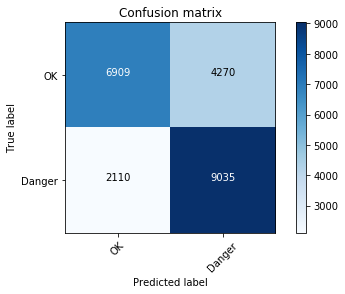

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['OK','Danger'],normalize= False,  title='Confusion matrix')

In [27]:
from sklearn.tree import DecisionTreeClassifier
# create an instance of the DecisionTreeClassifier called loanTree
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
# training
loanTree.fit(X_train,Y_train)
loanTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
yhat_dt = loanTree.predict(X_test)
jaccard_dt = jaccard_similarity_score(Y_test, yhat_dt)
print("DT Jaccard index: ", jaccard_dt)
f1_score_dt = f1_score(Y_test, yhat_dt, average='weighted')
print("DT F1-score: ", f1_score_dt)

DT Jaccard index:  0.7136713850564415
DT F1-score:  0.7099078986561742


In [51]:
# import library
from sklearn.linear_model import LogisticRegression
# training
LR = LogisticRegression(C=2).fit(X_train,Y_train)
LR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
yhat_lg = LR.predict(X_test)
yhat_lg_prob = LR.predict_proba(X_test)
jaccard_lg = jaccard_similarity_score(Y_test, yhat_lg)
print("LR Jaccard index: ", jaccard_lg)
f1_score_lg = f1_score(Y_test, yhat_lg, average='weighted')
print("LR F1-score: ", f1_score_lg)
logloss_lg = log_loss(Y_test, yhat_lg_prob)
print("LR log loss: ", logloss_lg)

LR Jaccard index:  0.7102413349011703
LR F1-score:  0.7081211777691742
LR log loss:  0.5398568538465066


In [20]:
# import library
from sklearn import svm
# training
clf = svm.SVC()
clf.fit(X_train, Y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
yhat_svm = clf.predict(X_test)
jaccard_svm = jaccard_similarity_score(Y_test, yhat_svm)
print("SVM Jaccard index: ", jaccard_svm)
f1_score_svm = f1_score(Y_test, yhat_svm, average='weighted')
print("SVM F1-score: ", f1_score_svm)

SVM Jaccard index:  0.708617503779607
SVM F1-score:  0.70662254199849


In [13]:
foliumdata = normalized_df[['SEVERITYCODE', 'X', 'Y','LOCATION']] 
foliumdata.head()



,SEVERITYCODE,X,Y,LOCATION
157662,2,-122.340088,47.666746,GREEN LAKE WAY N BETWEEN N 52ND ST AND N 53RD ST
113441,2,-122.329235,47.567668,4TH AVE S AND S INDUSTRIAL EB WAY
134358,2,-122.329049,47.593341,4TH AVE S BETWEEN I90 WB 4TH AV OFF RP AND S R...
98151,2,-122.373588,47.668665,14TH AVE NW AND NW MARKET ST
147161,2,-122.329367,47.613962,BOREN AVE BETWEEN PIKE ST AND PINE ST


In [20]:
lowseverity = foliumdata.loc[foliumdata['SEVERITYCODE'] == 1]
lowseverityfilter = lowseverity.head(500)

In [19]:
highseverity = foliumdata.loc[foliumdata['SEVERITYCODE'] == 2]
highseverityfilter = highseverity.head(500)

In [17]:
# Saving lat e lon and removing NaN
points = (lowseverity.Y.fillna(0),lowseverity.X.fillna(0))
coordinates =[]
# Setting lat and long 
lat = points[0]
long = points[1]
# Latitude and longitude that will open map. Here I put central of city São Paulo
mapa = folium.Map(location=[47.608013, -122.335167])
# Append latitude and longitude coordinates array
for la,lo in zip(lat,long):
    coordinates.append([la,lo])
   
# We have about 700000 lines, but jupyter notebook ins't possible to show all these points.
# To impress all data you can salve as a html file 
#mapa.save("map.html")
# Or to show onlye a piece
mapa.add_child(plugins.HeatMap(coordinates[0:5000]))

In [18]:
# Saving lat e lon and removing NaN
points = (highseverity.Y.fillna(0),highseverity.X.fillna(0))
coordinates =[]
# Setting lat and long 
lat = points[0]
long = points[1]
# Latitude and longitude that will open map. Here I put central of city São Paulo
mapa = folium.Map(location=[47.608013, -122.335167])
# Append latitude and longitude coordinates array
for la,lo in zip(lat,long):
    coordinates.append([la,lo])
   
# We have about 700000 lines, but jupyter notebook ins't possible to show all these points.
# To impress all data you can salve as a html file 
#mapa.save("map.html")
# Or to show onlye a piece
mapa.add_child(plugins.HeatMap(coordinates[0:5000]))

In [21]:
from folium.plugins import MarkerCluster
m = folium.Map(
    location=[47.608013, -122.335167],
    tiles='cartodbdark_matter',
    zoom_start=11
)
mc = MarkerCluster()
    
for index, severity in lowseverityfilter.iterrows():
  mc.add_child(folium.Marker([severity['Y'], severity['X']], 
              popup=str(severity['LOCATION']),
              tooltip=severity['SEVERITYCODE'],
              icon=folium.Icon(icon='book'))).add_to(m)
  
m

In [22]:
from folium.plugins import MarkerCluster
m = folium.Map(
    location=[47.608013, -122.335167],
    tiles='cartodbdark_matter',
    zoom_start=11
)
mc = MarkerCluster()
    
for index, severity in highseverityfilter.iterrows():
  mc.add_child(folium.Marker([severity['Y'], severity['X']], 
              popup=str(severity['LOCATION']),
              tooltip=severity['SEVERITYCODE'],
              icon=folium.Icon(icon='book'))).add_to(m)
  
m